This example shows how to use k-NN classifier to classify a dataset. We will first generate a binary classification dataset consisitng of 2D feature vectors, randomly sampled from two Gaussian distributions. We will then learn a k-NN classifier to separate the two classes.

In [70]:
import numpy


In [71]:
N = 5

Lets create our 2D dataset D by selecting samples from each feature X1 and X2 as follows. We are taking random samples from a 2D Gassian as our class. We use two Gaussians that differ by their means only. Covariances are the same.

In [72]:
pos = numpy.random.multivariate_normal([0,0], [[1,0],[0,1]], 2 * N)
neg = numpy.random.multivariate_normal([2,2], [[1,0],[0,1]], 2 * N)

The next few lines are for enabling plottng within ipython. A nice feature to have but has nothing to do with k-NN. So do not worry too much about matploylib.

In [73]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Now that we have imported matplotlib, which is a plotting utility lets visualize our two classes, positives in blue dots and negatives in red dots.

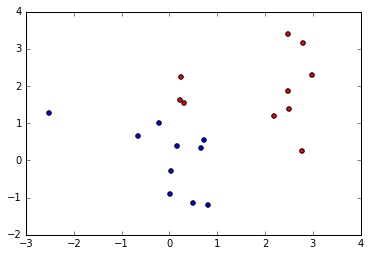

In [74]:
plt.scatter(neg[:,0], neg[:,1], c='r')
plt.scatter(pos[:,0], pos[:,1], c='b')

They do look decently separated. We might be able to learn a binary classifier using k-NNs.

Lets split our dataset into equal train and test portions.

In [76]:
train_pos = pos[:N,:]
test_pos = pos[N:,:]
train_neg = neg[:N,:]
test_neg = neg[:N,:]

To confirm ourselves that the train and test datasets have equal numbers of pos and neg instances lets print the number of instances in each list.

In [77]:
print len(train_pos), len(train_neg)

5 5


In [78]:
print len(test_pos), len(test_neg)

5 5


Lets assign pos (+1) and neg (-1) labels to our train and test instances.

In [83]:
train_data = [(1, x) for x in train_pos]
train_data.extend([(-1, x) for x in train_neg])

In [84]:
test_data = [(1, x) for x in test_pos]
test_data.extend([(-1, x) for x in test_neg])

To see that we have properly made tuples of (label, instance) lets print train and test data.

In [85]:
print train_data

[(1, array([-0.21573572,  1.01393918])), (1, array([ 0.16041507,  0.38033502])), (1, array([ 0.65737961,  0.34005546])), (1, array([ 0.7324509 ,  0.53833867])), (1, array([-0.66701596,  0.64787602])), (-1, array([ 0.31489155,  1.53285761])), (-1, array([ 2.18220189,  1.180832  ])), (-1, array([ 2.47369193,  3.39316492])), (-1, array([ 2.48507913,  1.86291584])), (-1, array([ 2.79752535,  3.16656252]))]


In [86]:
print test_data

[(1, array([-2.51778638,  1.27604196])), (1, array([ 0.50119176, -1.15545134])), (1, array([ 0.81307025, -1.18862623])), (1, array([ 0.01863139, -0.90371702])), (1, array([ 0.02881656, -0.28613476])), (-1, array([ 0.31489155,  1.53285761])), (-1, array([ 2.18220189,  1.180832  ])), (-1, array([ 2.47369193,  3.39316492])), (-1, array([ 2.48507913,  1.86291584])), (-1, array([ 2.79752535,  3.16656252]))]


Before we do the actual k-NN implementation lets create the cosine similarity function that we will use to find the neighbours.

In [87]:
def sim(p, q):
    score = numpy.dot(p,q) / (numpy.linalg.norm(p) * numpy.linalg.norm(q))
    return score
    

Now lets implement a function that predicts the label of a test instance using the k-NN algorithm.

In [ ]:
def predict(x, k):
    L = [(y, sim(x, z)) for (y,z) in train_data]
    L.sort(lambda a,b: -1 if a[1] > b[1] else 1)
    #print L[:k]
    score = sum([e[0] for e in L[:k]])
    if score > 0:
        return 1
    else:
        return -1
    
    

Take a moment to study the predict function. k-NN happens here. We are given k and the instance to be classified, x. The first thing we do is computing the similarity scores between x and each instance z in our train dataset. We must also store the labels so that we can later find the majority label.

Next, we need to find the neighbours. For that we sort this list of tuples by the value of the second item in tuples, which is similarity. lambda expressions are convenient ways to write in-place functions. Here, we take two elements from our list, compare their similarity scores and return -1 or +1. The sort function will then use this to sort the list. In this case, it will sort in the descending order of similarity scores.

If you would like to confirm that it is indeed the descending order you can print the list after sorting (uncomment that line).

Next, we must find the majority label. Since we are doing binary classification and our labels are -1 and +1, when we add the labels for the nearest neigbours if we get a positive value then there must be more +1s than -1s, vice versa. You might have to do more complicated stuff for finding the majority label if there were more than 2 classes. But it is easy for the binary case as shown here.

In [98]:
print predict(test_data[0][1], 5)

[(1, 0.9548145024625021), (1, 0.62780125840652634), (-1, 0.2633300725175422), (1, 0.069890338942266081), (-1, -0.16016506286816518)]
1


Lets compute the accuracy of our k-NN classifier.

In [101]:
corrects = 0
k = 5
for (y,x) in test_data:
    if y == predict(x, k):
        corrects += 1
accuracy = float(corrects) / float(len(test_data))
print "Accuracy =", accuracy

Accuracy = 0.7


So we have a decent? classifier here. Try the following things:
* change the value of k
* increase the number of instances N
* separate or bring together the two classes by adjusting the means of the two Gaussians.

How does the accuracy vary in each case?